2025/04/29 17:48:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'ReAct-Agent'.
2025/04/29 17:48:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ReAct-Agent, version 1
Created version '1' of model 'ReAct-Agent'.


🏃 View run log-model at: http://127.0.0.1:5000/#/experiments/681503131680600232/runs/f8f1af488a9148918e6a1f682813d3b3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/681503131680600232


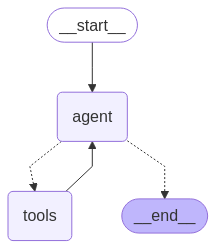


User:  Hi, my name is Bob
Bot:  Hello Bob! 


User:  What is the time now?
Bot:  05:49 PM 


User:  What is my name again?
Bot:  Bob 

StateSnapshot(values={'messages': [HumanMessage(content='Hi, my name is Bob', additional_kwargs={}, response_metadata={}), AgentAction(tool='greet_user', tool_input='name="Bob', log='Thought: The user has introduced themselves. I should greet them back.\nAction: greet_user\nAction Input: name="Bob"'), AgentFinish(return_values={'output': 'Hello Bob!'}, log='Thought: The user has already been greeted, and I have received confirmation of the greeting. There is nothing more to do.\nFinal Answer: Hello Bob!'), HumanMessage(content='What is the time now?', additional_kwargs={}, response_metadata={}), AgentAction(tool='Time', tool_input='', log='Thought: The user is asking for the current time. I should use the `Time` tool to get it.\nAction: Time\nAction Input: '), AgentFinish(return_values={'output': '05:49 PM'}, log='Thought: The user asked for the time, 

[Trace(request_id=5116713440cc4692a61a7b233e775752), Trace(request_id=fd57b839607a479fb164ee86cbd06ecd), Trace(request_id=1180b07111e14a778aba37ceba70bf2c)]

In [1]:
import os
import mlflow
from IPython.display import Image, display
from langchain_core.messages import HumanMessage

# Set-up MLFlow
mlflow.set_tracking_uri(uri=os.getenv('MLFLOW_TRACKING_URI'))
mlflow.set_experiment('LangGraph-ReAct-Agent')
mlflow.langchain.autolog(log_traces=True, silent=True)
MODEL_NAME = 'ReAct-Agent'

# Log model from code
with mlflow.start_run(run_name='log-model'):
    mlflow.langchain.log_model(
        lc_model='agent/graph.py',
        artifact_path='agent',
        code_paths=['agent'],
        registered_model_name=MODEL_NAME,
        loader_fn=None,
        persist_dir=None,
    )

# Load model and perform inference
with mlflow.start_run(run_name='inference-run'):
	graph = mlflow.langchain.load_model(model_uri=f'models:/{MODEL_NAME}/1')
	display(Image(graph.get_graph().draw_mermaid_png()))
 
	config = {'configurable': {'thread_id': '1', 'model': 'gemma3:27b'}}
	for query in ['Hi, my name is Bob', 'What is the time now?', 'What is my name again?']:
		response = 	graph.invoke({'messages': [HumanMessage(content=query)]}, config=config)['messages'][-1].log
		print('\nUser: ', query)
		print('Bot:', response.split('Final Answer:')[-1], '\n')

	print(graph.get_state(config=config))